# InternVL3.5-2B Gibberish Token Analyzation

In [1]:
import json

# read jsonl file
path = "/mnt/ssd/Projects/lmms-eval/outputs/hrbench_intern35_2b-think_tqa/OpenGVLab__InternVL3_5-2B/20251005_134859_samples_hrbench4k_tqa.jsonl"
with open(path, "r") as f:
    data = [json.loads(line) for line in f]

print(data[:5])  # print first 5 entries

[{'doc_id': 0, 'target': 'A', 'filtered_resps': ['<think>\nOkay, let\'s see. The question is asking what number is displayed above the entrance where the woman is standing. The options are A to D, with 27B being the first one.\n\nFirst, I need to look back at the context provided. The key part here is the small rectangular sign above the woman\'s head. The description says it has the characters "27B" on a dark background with light-colored numbers and letters. So the sign clearly shows "27B". \n\nWait, the question is about the number displayed above the entrance. The woman is standing at the entrance, and the sign is above her. So the sign\'s number is 27B. The options given are A. 27B, B.37B, C.27D, D.27E. \n\nSo the answer should be A. But let me double-check to make sure there\'s no trick here. The context mentions the address or unit number as "27B" on the sign. The wall shows signs of wear, but that\'s probably just background info. The mailbox is to the right, but that\'s not re

In [2]:
from transformers import AutoTokenizer, AutoModelForCausalLM

tokenizer = AutoTokenizer.from_pretrained("OpenGVLab/InternVL3_5-2B")

/mnt/ssd/Projects/lmms-eval/.venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
# Reorganize the data entries
gibberish_tokens = []
for e in data:
    resps = e["filtered_resps"][0]
    inputs = tokenizer(resps, return_tensors="pt")
    if len(inputs["input_ids"][0]) > 8000:
        gibberish_tokens.append(inputs["input_ids"][0][1:].tolist())  # exclude BOS token

# print first 5 gibberish tokens with scores
print(len(gibberish_tokens))
for i in range(5):
    print(gibberish_tokens[i])

627
[198, 32313, 11, 1077, 594, 1490, 13, 576, 3405, 374, 10161, 3425, 279, 45742, 374, 389, 279, 2115, 476, 1290, 3108, 315, 279, 5220, 13, 576, 2606, 525, 362, 13, 10083, 11, 425, 13, 7139, 398, 3403, 11, 356, 13, 758, 4065, 11, 422, 13, 13727, 382, 5338, 11, 358, 1184, 311, 1401, 518, 279, 2266, 3897, 13, 576, 5220, 374, 11259, 29388, 264, 14175, 7002, 448, 1051, 20058, 6177, 323, 14900, 49037, 13, 2932, 594, 9963, 264, 21511, 304, 1059, 1290, 1424, 323, 3330, 311, 1059, 2115, 448, 264, 38371, 1388, 7493, 13, 6252, 2115, 1424, 374, 389, 279, 7002, 11, 323, 1340, 702, 264, 4158, 87519, 8968, 916, 1059, 2115, 16882, 13, 42374, 1059, 11, 1052, 594, 264, 6303, 45742, 21810, 389, 279, 7002, 11, 323, 264, 61762, 14601, 1412, 1119, 279, 26298, 3403, 382, 4416, 11, 279, 45742, 374, 4815, 1059, 13, 576, 3405, 374, 911, 279, 2309, 315, 279, 45742, 8674, 311, 279, 5220, 13, 576, 2606, 525, 2115, 11, 1290, 11, 5961, 3403, 11, 476, 304, 4065, 382, 785, 1376, 1588, 374, 311, 7071, 700, 279, 5106,

['\n', 'Okay', ',', ' let', "'s", ' see', '.', ' The', ' question', ' is', ' asking', ' whether', ' the', ' mailbox', ' is', ' on', ' the', ' left', ' or', ' right']


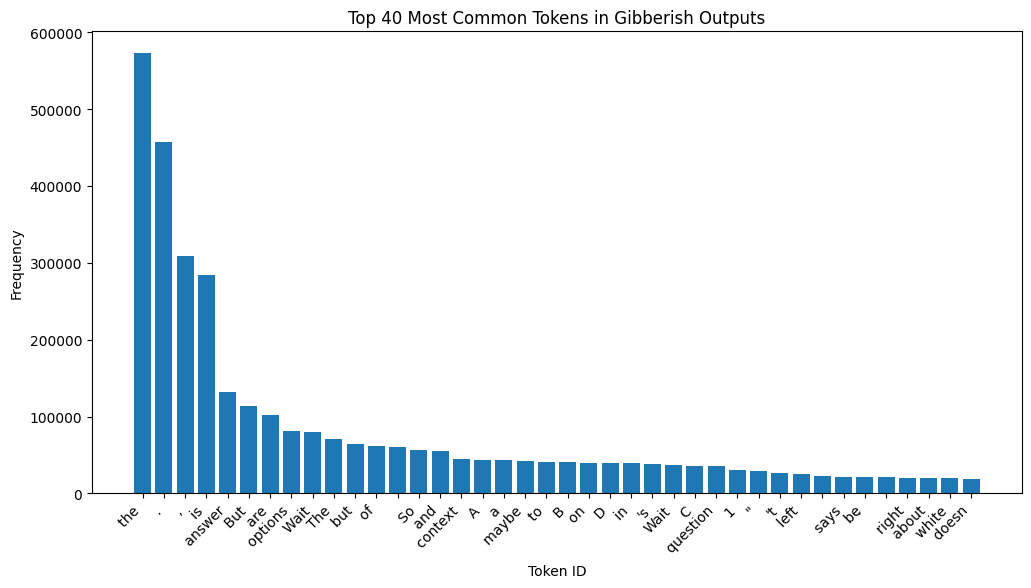

In [4]:
# Count token frequencies
from collections import Counter

all_tokens = [token for seq in gibberish_tokens for token in seq]
all_tokens_decoded = tokenizer.batch_decode(all_tokens, skip_special_tokens=True)
print(all_tokens_decoded[:20])  # print first 20 decoded tokens
token_counts = Counter(all_tokens_decoded)

# Visualize the most common tokens using matplotlib
import matplotlib.pyplot as plt

N = 40
most_common = token_counts.most_common(N)
tokens, counts = zip(*most_common)
plt.figure(figsize=(12, 6))
plt.bar(tokens, counts)
plt.xlabel("Token ID")
# Tilt x-axis labels for better readability
plt.xticks(rotation=45, ha="right")
plt.ylabel("Frequency")
plt.title(f"Top {N} Most Common Tokens in Gibberish Outputs")
plt.show()

294
[198, 32313, 11, 1077, 594, 1490, 13, 576, 3405, 374, 10161, 1128, 1372, 374, 12596, 3403, 279, 19809, 1380, 279, 5220, 374, 11259, 13, 576, 2606, 525, 362, 13, 220, 17, 22, 33, 11, 425, 13, 220, 18, 22, 33, 11, 356, 13, 220, 17, 22, 35, 11, 422, 13, 220, 17, 22, 36, 382, 5338, 11, 358, 1184, 311, 1401, 518, 279, 2168, 3897, 13, 576, 5220, 374, 11259, 304, 4065, 315, 264, 6006, 448, 279, 1372, 220, 17, 22, 33, 3403, 432, 13, 576, 6006, 702, 264, 1841, 429, 2727, 330, 17, 22, 33, 3263, 576, 19809, 374, 264, 61762, 6388, 1495, 11, 323, 279, 6006, 374, 949, 315, 264, 4752, 13, 576, 5220, 374, 9963, 264, 4540, 323, 30587, 279, 7002, 1790, 311, 279, 6006, 13, 4710, 14190, 11, 279, 3405, 374, 911, 279, 1372, 12596, 3403, 279, 19809, 13, 576, 19809, 1588, 374, 279, 6006, 448, 279, 61762, 13, 576, 1841, 3403, 279, 6006, 374, 330, 17, 22, 33, 3263, 2055, 279, 4226, 1265, 387, 362, 13, 220, 17, 22, 33, 13, 1988, 1077, 752, 1779, 1549, 311, 1281, 2704, 358, 3207, 944, 3116, 4113, 382, 22464, 

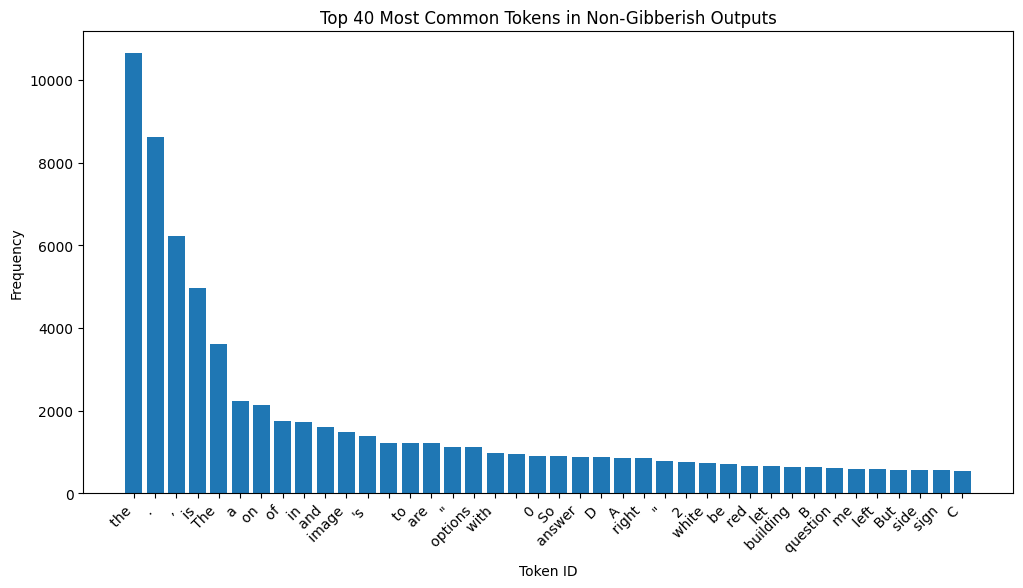

In [21]:
# Do the same analysis for non-gibberish outputs

non_gibberish_tokens = []
for e in data:
    resps = e["filtered_resps"][0]
    inputs = tokenizer(resps, return_tensors="pt")
    if len(inputs["input_ids"][0]) <= 8000:
        non_gibberish_tokens.append(inputs["input_ids"][0][1:].tolist())  # exclude BOS token
print(len(non_gibberish_tokens))
for i in range(5):
    print(non_gibberish_tokens[i])

# Count token frequencies
all_tokens_ng = [token for seq in non_gibberish_tokens for token in seq]
all_tokens_ng_decoded = tokenizer.batch_decode(all_tokens_ng, skip_special_tokens=True)
print(all_tokens_ng_decoded[:20])  # print first 20 decoded tokens
token_counts_ng = Counter(all_tokens_ng_decoded)

# Visualize the most common tokens using matplotlib
N = 40
most_common_ng = token_counts_ng.most_common(N)
tokens_ng, counts_ng = zip(*most_common_ng)
plt.figure(figsize=(12, 6))
plt.bar(tokens_ng, counts_ng)
plt.xlabel("Token ID")
# Tilt x-axis labels for better readability
plt.xticks(rotation=45, ha="right")
plt.ylabel("Frequency")
plt.title(f"Top {N} Most Common Tokens in Non-Gibberish Outputs")
plt.show()

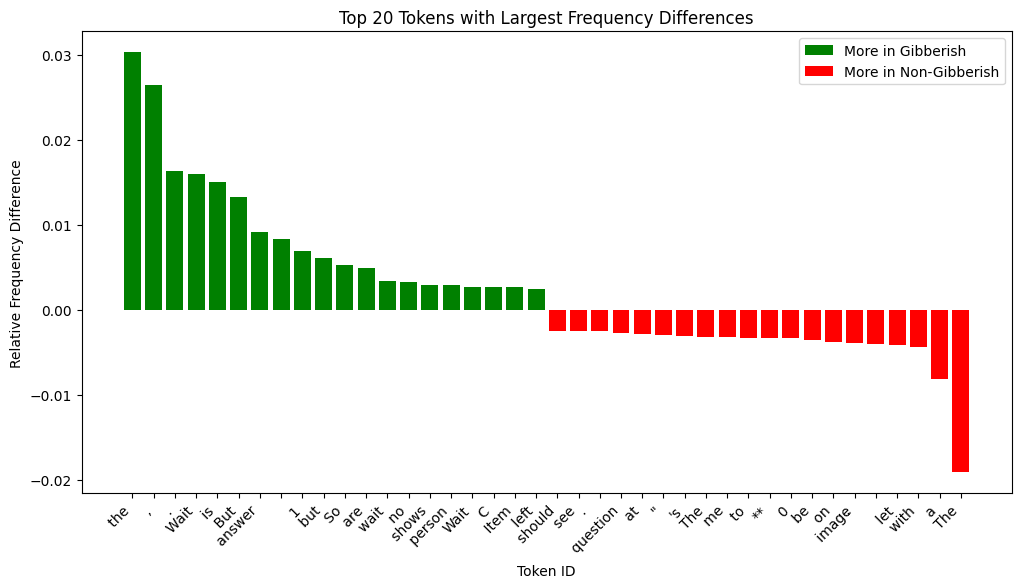

In [22]:
# Analyze the difference in token usage between gibberish and non-gibberish
# Calculate relative frequencies
total_gibberish = sum(token_counts.values())
total_non_gibberish = sum(token_counts_ng.values())
relative_freq_gibberish = {token: count / total_gibberish for token, count in token_counts.items()}
relative_freq_non_gibberish = {token: count / total_non_gibberish for token, count in token_counts_ng.items()}
all_tokens_set = set(relative_freq_gibberish.keys()).union(set(relative_freq_non_gibberish.keys()))
freq_diff = {token: relative_freq_gibberish.get(token, 0) - relative_freq_non_gibberish.get(token, 0) for token in all_tokens_set}

# Visualize top N tokens with largest positive and negative differences
N = 20
sorted_diff = sorted(freq_diff.items(), key=lambda x: x[1], reverse=True)
top_positive = sorted_diff[:N]
top_negative = sorted_diff[-N:]
tokens_pos, diffs_pos = zip(*top_positive)
tokens_neg, diffs_neg = zip(*top_negative)
plt.figure(figsize=(12, 6))
plt.bar(tokens_pos, diffs_pos, color="g", label="More in Gibberish")
plt.bar(tokens_neg, diffs_neg, color="r", label="More in Non-Gibberish")
plt.xlabel("Token ID")
# Tilt x-axis labels for better readability
plt.xticks(rotation=45, ha="right")
plt.ylabel("Relative Frequency Difference")
plt.title(f"Top {N} Tokens with Largest Frequency Differences")
plt.legend()
plt.show()